In [3]:
from tensorflow import keras
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image

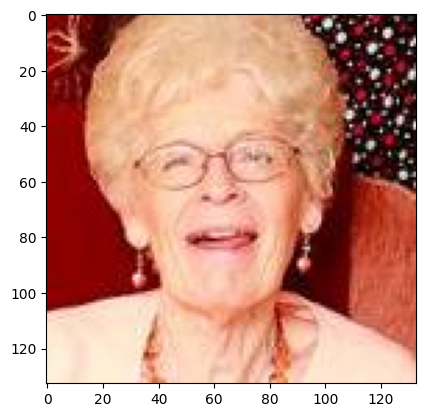

In [4]:
img = Image.open('./final_files/000002.jpg')
plt.imshow(np.array(img))

In [5]:
arr = np.array(img)
arr.shape

(133, 133, 3)

In [6]:
import os

# folder path
dir_path = './final_files'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)

File count: 7591


In [7]:
label_df = pd.read_csv('labels.csv', names = ['file_name', 'real_age'])

In [8]:
label_df.describe()

,file_name,real_age
count,7592,7592
unique,7592,98
top,file_name,30
freq,1,317


In [9]:
label_df.dtypes

file_name    object
real_age     object
dtype: object

In [10]:
label_df = label_df.iloc[1:]

In [11]:
label_df.describe()

,file_name,real_age
count,7591,7591
unique,7591,97
top,000000.jpg,30
freq,1,317


In [12]:
label_df = label_df.astype({"real_age": int})

In [13]:
label_df.isna().sum()

file_name    0
real_age     0
dtype: int64

In [14]:
label_df.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


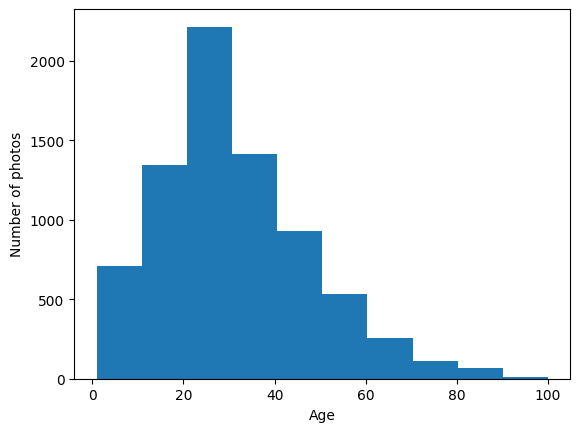

In [15]:
plt.hist(label_df.real_age)
plt.xlabel('Age')
plt.ylabel('Number of photos');

## Analysis of the data showed that the dataset is imbalanced, because the number of photos of elderly people is much smaller than that of young people.

In [16]:
def load_data(path, label_df):
    datagen = ImageDataGenerator(validation_split = 0.25, rescale = 1. / 255)
    train_datagen_flow = datagen.flow_from_dataframe(
        dataframe = label_df, 
        directory = path, 
        x_col = 'file_name', 
        y_col = 'real_age',
        has_ext = True, 
        target_size = (150,150),
        batch_size = 16, 
        class_mode = 'other', 
        subset = 'training', 
        seed = 42
    )
    val_datagen_flow = datagen.flow_from_dataframe(
        dataframe = label_df, 
        directory = path, 
        x_col = 'file_name', 
        y_col = 'real_age',
        has_ext = True, 
        target_size = (150,150),
        batch_size = 16, 
        class_mode = 'other', 
        subset = 'validation', 
        seed = 42
    )
    return train_datagen_flow, val_datagen_flow

In [25]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)

In [26]:
def train_model():
    backbone = ResNet50(input_shape = (150, 150, 3), 
                    weights = 'imagenet', 
                    include_top = False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation = 'relu'))
    return model

In [27]:
model = train_model()
train_datagen_flow, val_datagen_flow = load_data('./final_files',label_df)
features, target = next(train_datagen_flow)
print(features.shape, target.shape)
print(type(features), type(target))

Found 5694 validated image filenames.
Found 1897 validated image filenames.
(16, 150, 150, 3) (16,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [28]:
model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['mae'])
history = model.fit(train_datagen_flow, 
          validation_data = val_datagen_flow, 
          epochs = 15, verbose = 1)

Epoch 1/15


c:\Github\stuff\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


356/356 ━━━━━━━━━━━━━━━━━━━━ 477s 1s/step - loss: 340.1081 - mae: 13.9609 - val_loss: 314.8742 - val_mae: 13.1740
Epoch 2/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 443s 1s/step - loss: 119.7101 - mae: 8.4835 - val_loss: 255.2523 - val_mae: 12.6003
Epoch 3/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 442s 1s/step - loss: 91.8124 - mae: 7.3406 - val_loss: 372.4542 - val_mae: 14.8526
Epoch 4/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 442s 1s/step - loss: 69.5467 - mae: 6.4260 - val_loss: 198.7135 - val_mae: 10.5343
Epoch 5/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 442s 1s/step - loss: 41.6320 - mae: 5.0372 - val_loss: 120.6647 - val_mae: 8.1597
Epoch 6/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 439s 1s/step - loss: 36.1662 - mae: 4.6276 - val_loss: 103.2226 - val_mae: 7.6325
Epoch 7/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 437s 1s/step - loss: 30.6636 - mae: 4.2379 - val_loss: 116.0205 - val_mae: 7.9640
Epoch 8/15
356/356 ━━━━━━━━━━━━━━━━━━━━ 435s 1s/step - loss: 23.0124 - mae: 3.6693 - val_loss: 100.6025 - val_mae: 7.8900
Epoch 9/15
356/356 ━━━━━━━━━

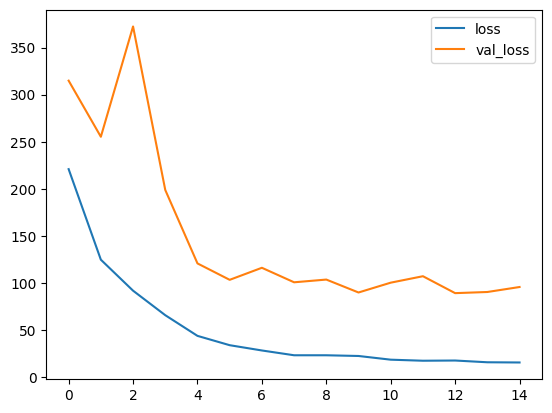

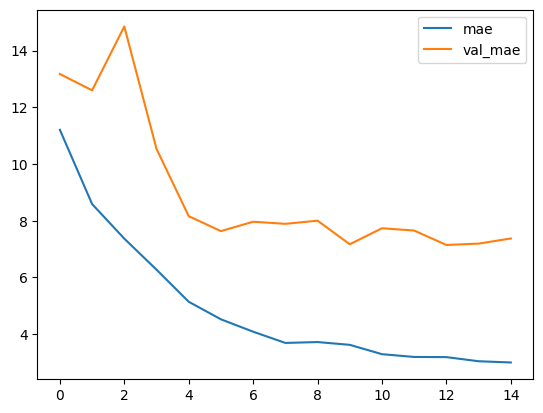

In [29]:
history_frame = pd.DataFrame(history.history)

history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['mae', 'val_mae']].plot();

In [42]:
y_pred = model.predict(val_datagen_flow)

119/119 ━━━━━━━━━━━━━━━━━━━━ 31s 256ms/step


In [43]:
score = model.evaluate(val_datagen_flow)
print(f'Test loss: {score[0]} / Test mae: {score[1]}')

119/119 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - loss: 89.0870 - mae: 7.1366
Test loss: 95.5877685546875 / Test mae: 7.373386859893799


In [44]:
model.save("model.keras")

In [45]:
loaded_model = keras.models.load_model("model.keras")

In [46]:
load_y_pred = loaded_model.predict(val_datagen_flow)

119/119 ━━━━━━━━━━━━━━━━━━━━ 33s 264ms/step


In [47]:
score = loaded_model.evaluate(val_datagen_flow)
print(f'Test loss: {score[0]} / Test mae: {score[1]}')

119/119 ━━━━━━━━━━━━━━━━━━━━ 32s 255ms/step - loss: 92.9502 - mae: 7.3494
Test loss: 95.58777618408203 / Test mae: 7.373388290405273
